In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
num_epochs = 3
batch_size = 4
learning_rate = 0.001

In [11]:
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)

test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=0)

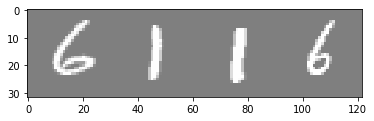

tensor(6) tensor(1) tensor(1) tensor(6)


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j] for j in range(4)))

In [13]:
print(len(train_set))
print(len(test_set))
print(images[0].shape)

60000
10000
torch.Size([1, 28, 28])


In [14]:
import torch.nn as nn

model = nn.Sequential(
            nn.Conv2d(1, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),
            nn.Flatten(),
            nn.Linear(32 * 13 * 13, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )

In [15]:
import torch.optim as optim

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [27]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):  # loop over the dataset multiple times
    for i, (images, labels) in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        images = images.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        if (i+1) % 1000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/3], Step [1000/15000], Loss: 0.2768
Epoch [1/3], Step [2000/15000], Loss: 0.0281
Epoch [1/3], Step [3000/15000], Loss: 0.0365
Epoch [1/3], Step [4000/15000], Loss: 0.0002
Epoch [1/3], Step [5000/15000], Loss: 0.0000
Epoch [1/3], Step [6000/15000], Loss: 0.0144
Epoch [1/3], Step [7000/15000], Loss: 0.0182
Epoch [1/3], Step [8000/15000], Loss: 0.2388
Epoch [1/3], Step [9000/15000], Loss: 0.0044
Epoch [1/3], Step [10000/15000], Loss: 0.0058
Epoch [1/3], Step [11000/15000], Loss: 2.2715
Epoch [1/3], Step [12000/15000], Loss: 0.0127
Epoch [1/3], Step [13000/15000], Loss: 0.0002
Epoch [1/3], Step [14000/15000], Loss: 0.0773
Epoch [1/3], Step [15000/15000], Loss: 0.0060
Epoch [2/3], Step [1000/15000], Loss: 0.0062
Epoch [2/3], Step [2000/15000], Loss: 0.1098
Epoch [2/3], Step [3000/15000], Loss: 0.0006
Epoch [2/3], Step [4000/15000], Loss: 0.0001
Epoch [2/3], Step [5000/15000], Loss: 0.0024
Epoch [2/3], Step [6000/15000], Loss: 0.0050
Epoch [2/3], Step [7000/15000], Loss: 0.1633
Epoc

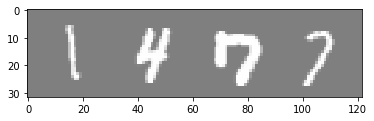

GroundTruth:  tensor(1) tensor(4) tensor(7) tensor(7)


In [38]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(4)))

In [39]:
images.shape

torch.Size([4, 1, 28, 28])

In [40]:
images = images.to(device)
labels = labels.to(device)

outputs = model(images)

In [41]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % predicted[j]
                              for j in range(4)))

Predicted:  tensor(1, device='cuda:0') tensor(4, device='cuda:0') tensor(7, device='cuda:0') tensor(7, device='cuda:0')


In [21]:
correct = 0
total = 0
with torch.no_grad():
    for (images, labels) in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {len(test_set)} test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


In [25]:
torch.save(model, './model.pth')